In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [336]:
df = pd.read_csv(
    "v-sales-data.csv",
)

In [337]:
df.head(30)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0    BMW  1 Series M  2011  premium unleaded (required)      335.0   
1    BMW    1 Series  2011  premium unleaded (required)      300.0   
2    BMW    1 Series  2011  premium unleaded (required)      300.0   
3    BMW    1 Series  2011  premium unleaded (required)      230.0   
4    BMW    1 Series  2011  premium unleaded (required)      230.0   
5    BMW    1 Series  2012  premium unleaded (required)      230.0   
6    BMW    1 Series  2012  premium unleaded (required)      300.0   
7    BMW    1 Series  2012  premium unleaded (required)      300.0   
8    BMW    1 Series  2012  premium unleaded (required)      230.0   
9    BMW    1 Series  2013  premium unleaded (required)      230.0   
10   BMW    1 Series  2013  premium unleaded (required)      300.0   
11   BMW    1 Series  2013  premium unleaded (required)      230.0   
12   BMW    1 Series  2013  premium unleaded (required)      300.0   
13   BMW    1 Series  2013  premium unleaded (required)      230.0   
14   BMW    1 Series  2013  premium unleaded (required)      230.0   
15   BMW    1 Series  2013  premium unleaded (required)      320.0   
16   BMW    1 Series  2013  premium unleaded (required)      320.0   
17  Audi         100  1992             regular unleaded      172.0   
18  Audi         100  1992             regular unleaded      172.0   
19  Audi         100  1992             regular unleaded      172.0   
20  Audi         100  1992             regular unleaded      172.0   
21  Audi         100  1992             regular unleaded      172.0   
22  Audi         100  1993             regular unleaded      172.0   
23  Audi         100  1993             regular unleaded      172.0   
24  Audi         100  1993             regular unleaded      172.0   
25  Audi         100  1993             regular unleaded      172.0   
26  Audi         100  1993             regular unleaded      172.0   
27  Audi         100  1994             regular unleaded      172.0   
28  Audi         100  1994             regular unleaded      172.0   
29  Audi         100  1994             regular unleaded      172.0   

    Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                6.0            MANUAL   rear wheel drive              2.0   
1                6.0            MANUAL   rear wheel drive              2.0   
2                6.0            MANUAL   rear wheel drive              2.0   
3                6.0            MANUAL   rear wheel drive              2.0   
4                6.0            MANUAL   rear wheel drive              2.0   
5                6.0            MANUAL   rear wheel drive              2.0   
6                6.0            MANUAL   rear wheel drive              2.0   
7                6.0            MANUAL   rear wheel drive              2.0   
8                6.0            MANUAL   rear wheel drive              2.0   
9                6.0            MANUAL   rear wheel drive              2.0   
10               6.0            MANUAL   rear wheel drive              2.0   
11               6.0            MANUAL   rear wheel drive              2.0   
12               6.0            MANUAL   rear wheel drive              2.0   
13               6.0            MANUAL   rear wheel drive              2.0   
14               6.0            MANUAL   rear wheel drive              2.0   
15               6.0            MANUAL   rear wheel drive              2.0   
16               6.0            MANUAL   rear wheel drive              2.0   
17               6.0            MANUAL  front wheel drive              4.0   
18               6.0            MANUAL  front wheel drive              4.0   
19               6.0         AUTOMATIC    all wheel drive              4.0   
20               6.0            MANUAL  front wheel drive              4.0   
21               6.0            MANUAL    all wheel drive              4.0   
22               6.0            MANUAL 

In [338]:
df.shape

(11914, 16)

In [339]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##### Here Popularity and MSRP have signficant greater standard deviation then normal suggesting their distribution might not be normal

In [341]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [342]:
df.describe(include=["object"])

Make           Model  Engine Fuel Type Transmission Type  \
count       11914           11914             11911             11914   
unique         48             915                10                 5   
top     Chevrolet  Silverado 1500  regular unleaded         AUTOMATIC   
freq         1123             156              7172              8266   

            Driven_Wheels Market Category Vehicle Size Vehicle Style  
count               11914            8172        11914         11914  
unique                  4              71            3            16  
top     front wheel drive       Crossover      Compact         Sedan  
freq                 4787            1110         4764          3048

In [343]:
df["Market Category"].value_counts().head(30)

Market Category
Crossover                                       1110
Flex Fuel                                        872
Luxury                                           855
Luxury,Performance                               673
Hatchback                                        641
Performance                                      601
Crossover,Luxury                                 410
Luxury,High-Performance                          334
Exotic,High-Performance                          261
Hatchback,Performance                            252
Factory Tuner,Luxury,High-Performance            215
High-Performance                                 199
Hybrid                                           123
Crossover,Luxury,Performance                     113
Factory Tuner,High-Performance                   106
Factory Tuner,Performance                         92
Flex Fuel,Performance                             87
Diesel                                            84
Exotic,Luxury,High-Performance

In [344]:
df["Make"].value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [345]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [346]:
duplicate_mask = df.duplicated()
print(duplicate_mask.value_counts())
df[duplicate_mask]

False    11199
True       715
Name: count, dtype: int64


Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14                  6.0            MANUAL   rear wheel drive              2.0   
18                  6.0            MANUAL  front wheel drive              4.0   
20                  6.0            MANUAL  front wheel drive              4.0   
24                  6.0            MANUAL  front wheel drive              4.0   
25                  6.0            MANUAL  front wheel drive              4.0   
...                 ...               ...                ...              ...   
11481               4.0            MANUAL   four wheel drive              2.0   
11603               4.0         AUTOMATIC    all wheel drive              4.0   
11604               4.0         AUTOMATIC  front wheel drive              4.0   
11708               6.0         AUTOMATIC    all wheel drive              4.0   
11717               6.0         AUTOMATIC  front wheel drive              4.0   

                    Market Category Vehicle Size Vehicle Style  highway MPG  \
14               Luxury,Performance      Compact         Coupe           28   
18                           Luxury      Midsize         Sedan           24   
20                           Luxury      Midsize         Sedan           24   
24                           Luxury      Midsize         Sedan           24   
25                           Luxury      Midsize         Sedan           24   
...                             ...          ...           ...          ...   
11481                           NaN      Compact       2dr SUV           26   
11603  Crossover,Luxury,Performance      Midsize       4dr SUV           29   
11604              Crossover,Luxury      Midsize       4dr SUV           30   
11708                     Crossover      Midsize       4dr SUV           22   
11717                     Crossover      Midsize       4dr SUV           22   

       city mpg  Popularity   MSRP  
14           19        3916  31500  
18           17        3105   2000  
20           17        3105   2000  
24           17        3105   2000  
25           17        3105   2000  
...         ...         ...    ...  
11481        22         481   2000  
11603        20         870  46350  
11604        23         870  40950  
11708        15         481  29149  
11717        16         481  27499  

[715 rows x 16 columns]

#### As expected the distribution was not normal because of outliers

In [347]:
df["MSRP"].mean()

40594.737032063116

In [348]:
df["MSRP"].median()

29995.0

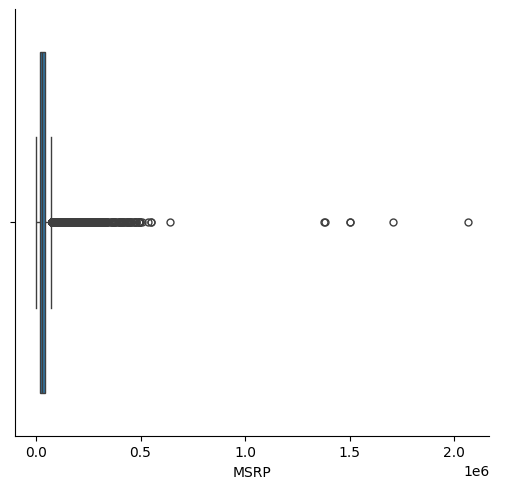

In [349]:
sns.catplot(x="MSRP", data=df, kind="box")

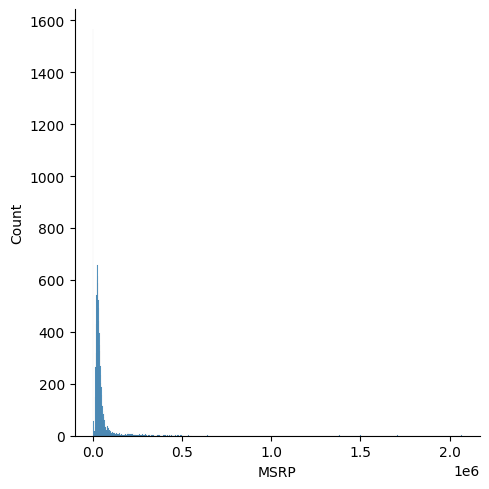

In [350]:
sns.displot(x="MSRP", data=df, kind="hist")

In [351]:
YT = pd.crosstab(df["Year"],df["Transmission Type"])
YT

Transmission Type  AUTOMATED_MANUAL  AUTOMATIC  DIRECT_DRIVE  MANUAL  UNKNOWN
Year                                                                         
1990                              0         52             0      71        0
1991                              0         57             0      87        8
1992                              0         46             0     131        0
1993                              0         53             0     154        2
1994                              0         56             0     107        0
1995                              0         69             0      66        0
1996                              0         64             0      67        0
1997                              0         66             0     107        2
1998                              0         52             0     102        0
1999                              0         56             0      62        2
2000                              0         54             0      59        5
2001                              0        100             0      68        0
2002                              3        144             0      58        0
2003                              6        152             0      80        0
2004                              7        165             0      63        0
2005                              7        159             0      47        0
2006                              2        165             0      38        0
2007                              3        273             0      69        0
2008                             11        244             0      94        0
2009                              9        274             0      96        0
2010                              2        227             0      69        0
2011                              4        211             0      70        0
2012                             31        260             1      95        0
2013                             54        212             2      98        0
2014                             72        383            12     122        0
2015                            165       1633            19     353        0
2016                            152       1683            25     297        0
2017                             98       1356             9     205        0

<Axes: xlabel='Year'>

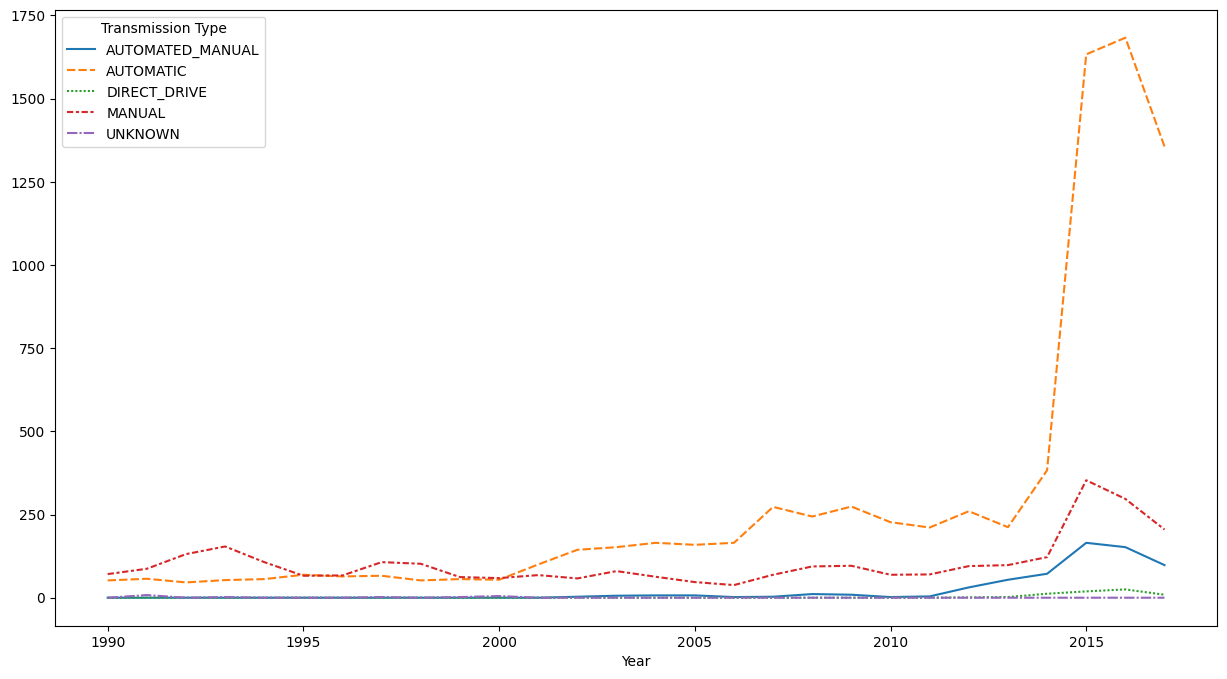

In [352]:
plt.figure(figsize=(15,8))
sns.lineplot(data=YT)

In [353]:

# print(df.quantile(numeric_only=True))

# expensive_cars=df[df['MSRP']>df.quantile(0.75,numeric_only=True)['MSRP']]

# expensive_cars.loc[expensive_cars['Market Category'].isna()].groupby(by=['Make']).agg(func={'Market Category':pd.Series.mode})

In [354]:
years_group = df.groupby(by=["Year"])

In [355]:
years_group["MSRP"].agg(func=["mean", "median"])

mean   median
Year                       
1990   2020.203252   2000.0
1991   2080.657895   2000.0
1992   2077.740113   2000.0
1993   2187.325359   2000.0
1994   2312.030675   2000.0
1995   2606.777778   2000.0
1996   2497.366412   2000.0
1997   3105.211429   2178.0
1998   2975.597403   2654.0
1999   3096.158333   2800.0
2000   3166.669492   2526.0
2001  41500.666667  22767.5
2002  33744.156098  23055.0
2003  39774.063025  24547.5
2004  36107.336170  25160.0
2005  36746.971831  26099.0
2006  32056.468293  27250.0
2007  34974.194203  27580.0
2008  54138.916905  27935.0
2009  49838.559367  29820.0
2010  50642.496644  29952.0
2011  57548.178947  33790.0
2012  59516.235142  30595.0
2013  48698.502732  31490.0
2014  63226.363328  34525.0
2015  46794.461290  35000.0
2016  47220.743162  36005.0
2017  42191.534173  36647.5

In [356]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

# Replace NaN Values of Market category

In [357]:

df['Market Category']=df.groupby(by=["Make"])['Market Category'].apply(lambda x:x.fillna(x.mode().iloc[0])).sort_index(level=1).reset_index(drop=True)
# df[df.groupby(by=["Make"])['Engine HP'].apply(lambda x:x.fillna(x.mean())).sort_index(level=1).reset_index(drop=True).isna()]
#     mode_value = series.mode().iloc[0] if not series.mode().empty else None
#     return series.fillna(mode_value)


# df.groupby('Make')['Market Category'].transform(fill_with_mode)

In [358]:
df['Engine HP'].isna().value_counts()

Engine HP
False    11845
True        69
Name: count, dtype: int64

In [359]:
prefered_df = df.loc[df["Year"] > 1999].copy(deep=True)

In [360]:
years_group.nunique()

Make  Model  Engine Fuel Type  Engine HP  Engine Cylinders  \
Year                                                               
1990    22     39                 2         33                 4   
1991    20     44                 2         43                 4   
1992    22     48                 2         51                 6   
1993    22     55                 2         53                 6   
1994    23     50                 1         50                 5   
1995    25     49                 1         49                 5   
1996    23     46                 1         43                 5   
1997    23     45                 1         42                 5   
1998    21     45                 1         37                 4   
1999    19     39                 2         32                 5   
2000    21     44                 2         39                 5   
2001    25     50                 3         45                 4   
2002    23     55                 4         49                 5   
2003    28     68                 4         50                 4   
2004    29     71                 3         51                 5   
2005    26     69                 3         46                 5   
2006    24     55                 3         53                 4   
2007    27     57                 3         63                 4   
2008    30     71                 5         71                 7   
2009    29     81                 5         81                 6   
2010    29     72                 6         68                 5   
2011    27     78                 7         74                 5   
2012    30     81                 8         77                 6   
2013    30     87                 8         87                 7   
2014    34    142                 7        124                 8   
2015    37    319                 9        219                 8   
2016    36    321                 7        200                 7   
2017    30    265                 8        176                 7   

      Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
Year                                                                       
1990                  2              4                3               11   
1991                  3              4                3               13   
1992                  2              4                2               11   
1993                  3              4                2               11   
1994                  2              4                3                9   
1995                  2              4                3               11   
1996                  2              4                3               13   
1997                  3              4                3               14   
1998                  2              4                3               13   
1999                  3              4                3               12   
2000                  3              4                3               13   
2001                  2              4                3               20   
2002                  3              4                3               15   
2003                  3              4                3               18   
2004                  3              4                3               16   
2005                  3              4                3               17   
2006                  3              4                2               20   
2007                  3              4                2               19   
2008                  3              4                2               22   
2009                  3              4                2               24   
2010                  3              4                2               28   
2011                  3              4                2               33   
2012                  4              4                3               37   
2013                  4              4                3          

In [361]:
df["Make"].unique().size

48

In [362]:
brand_group = df.groupby(by=["Make"])

##### This is list of brands with respect to their popular market categories

In [363]:
brand_group["Market Category"].agg(func=[pd.Series.mode])

mode
Make                                         
Acura                                  Luxury
Alfa Romeo            Luxury,High-Performance
Aston Martin          Exotic,High-Performance
Audi                                   Luxury
BMW                        Luxury,Performance
Bentley        Exotic,Luxury,High-Performance
Bugatti               Exotic,High-Performance
Buick                               Crossover
Cadillac                   Luxury,Performance
Chevrolet                           Flex Fuel
Chrysler                            Flex Fuel
Dodge                               Flex Fuel
FIAT                                Hatchback
Ferrari               Exotic,High-Performance
Ford                                Flex Fuel
GMC                                 Flex Fuel
Genesis                    Luxury,Performance
HUMMER                                 Luxury
Honda                               Crossover
Hyundai                             Crossover
Infiniti                   Luxury,Performance
Kia                                 Crossover
Lamborghini           Exotic,High-Performance
Land Rover                   Crossover,Luxury
Lexus                      Luxury,Performance
Lincoln                                Luxury
Lotus                 Exotic,High-Performance
Maserati       Exotic,Luxury,High-Performance
Maybach        Exotic,Luxury,High-Performance
Mazda                               Crossover
McLaren               Exotic,High-Performance
Mercedes-Benz                          Luxury
Mitsubishi                          Crossover
Nissan                       High-Performance
Oldsmobile                        Performance
Plymouth                            Hatchback
Pontiac                           Performance
Porsche               Luxury,High-Performance
Rolls-Royce         Exotic,Luxury,Performance
Saab                                   Luxury
Scion                               Hatchback
Spyker                Exotic,High-Performance
Subaru                              Crossover
Suzuki                              Crossover
Tesla                      Exotic,Performance
Toyota                              Flex Fuel
Volkswagen              Hatchback,Performance
Volvo                                  Luxury

In [364]:
df["Make"].describe()

count         11914
unique           48
top       Chevrolet
freq           1123
Name: Make, dtype: object

In [365]:
print(df["Market Category"].unique().size)
df["Market Category"].unique()

71


array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', 'High-Performance', 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'Factory Tuner,High-Performance', 'Exotic,High-Performance',
       'Exotic,Factory Tuner,High-Performance', 'Crossover',
       'Factory Tuner,Performance', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
       '

In [366]:
new_data_frame = (
    df.groupby(by=["Market Category"])["MSRP"]
    .agg(func=["mean", "median"])
    .reset_index()
)
new_data_frame

Market Category          mean   median
0                                         Crossover  25000.418571  25347.5
1                                  Crossover,Diesel  54622.142857  54950.0
2          Crossover,Exotic,Luxury,High-Performance  83000.000000  83000.0
3               Crossover,Exotic,Luxury,Performance  72000.000000  72000.0
4   Crossover,Factory Tuner,Luxury,High-Performance  91916.153846  99375.0
..                                              ...           ...      ...
66                                    Luxury,Hybrid  54789.519231  53922.5
67                               Luxury,Performance  46596.040119  46250.0
68                        Luxury,Performance,Hybrid  66921.818182  61900.0
69                                      Performance  23821.038506  27295.0
70                               Performance,Hybrid  31900.000000  31900.0

[71 rows x 3 columns]

In [367]:
new_data_frame.loc[new_data_frame["mean"] > new_data_frame["median"]]

Market Category           mean    median
6            Crossover,Factory Tuner,Performance   29675.000000   29582.5
7                            Crossover,Flex Fuel   34149.921875   33355.0
8                     Crossover,Flex Fuel,Luxury   44797.000000   40052.5
13                    Crossover,Hatchback,Luxury   51062.857143   50620.0
15                              Crossover,Hybrid   35091.547619   32080.0
16                              Crossover,Luxury   43612.731707   42582.5
17                       Crossover,Luxury,Diesel   53901.470588   53620.0
18             Crossover,Luxury,High-Performance   90611.111111   67200.0
19                       Crossover,Luxury,Hybrid   47208.541667   46430.0
20                  Crossover,Luxury,Performance   52688.407080   47200.0
22                         Crossover,Performance   38282.753623   37495.0
23                                        Diesel   31345.178571   30145.0
25         Exotic,Factory Tuner,High-Performance  258741.285714  251600.0
26  Exotic,Factory Tuner,Luxury,High-Performance  207237.269231  198000.0
30                       Exotic,High-Performance  224818.406130  198250.0
32                Exotic,Luxury,High-Performance  201944.734177  138800.0
34                     Exotic,Luxury,Performance  379021.250000  329157.5
35                            Exotic,Performance   73080.000000   72750.0
36                Factory Tuner,High-Performance   53221.886792   45490.0
38         Factory Tuner,Luxury,High-Performance   88972.604651   70795.0
39              Factory Tuner,Luxury,Performance   27575.161290    8488.0
42                              Flex Fuel,Diesel   38288.750000   38195.0
45                              Flex Fuel,Luxury   56339.615385   47225.0
46             Flex Fuel,Luxury,High-Performance   87273.939394   79995.0
48                         Flex Fuel,Performance   44664.482759   40660.0
52      Hatchback,Factory Tuner,High-Performance   37395.769231   36750.0
53    Hatchback,Factory Tuner,Luxury,Performance   12314.222222    7398.0
56                              Hatchback,Hybrid   23282.152778   22715.0
57                              Hatchback,Luxury   23058.000000   21137.5
58                       Hatchback,Luxury,Hybrid   31566.666667   31250.0
59                  Hatchback,Luxury,Performance   23637.657895   21012.5
61                              High-Performance   33275.963554   31840.0
62                                        Hybrid   33566.707317   30140.0
64                       Luxury,High-Performance   88789.266467   79525.0
65                Luxury,High-Performance,Hybrid   68840.833333   49975.0
66                                 Luxury,Hybrid   54789.519231   53922.5
67                            Luxury,Performance   46596.040119   46250.0
68                     Luxury,Performance,Hybrid   66921.818182   61900.0

In [368]:
print(prefered_df.columns)
prefered_df.rename(str.lower, axis=1, inplace=True)
print(prefered_df.columns)
print(prefered_df["year"].value_counts())
prefered_df.groupby(by=["market category"])["msrp"].agg(func=["mean", "median"])
new_prefered_data_frame = (
    prefered_df.groupby(by=["market category"])["msrp"]
    .agg(func=["mean", "median"])
    .reset_index()
)
new_prefered_data_frame

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')
year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
2013     366
2008     349
2007     345
2010     298
2011     285
2003     238
2004     235
2005     213
2002     205
2006     205
2001     168
2000     118
Name: count, dtype: int64


market category          mean   median
0                                         Crossover  26670.489014  25995.0
1                                  Crossover,Diesel  54622.142857  54950.0
2          Crossover,Exotic,Luxury,High-Performance  83000.000000  83000.0
3               Crossover,Exotic,Luxury,Performance  72000.000000  72000.0
4   Crossover,Factory Tuner,Luxury,High-Performance  91916.153846  99375.0
..                                              ...           ...      ...
66                                    Luxury,Hybrid  54789.519231  53922.5
67                               Luxury,Performance  51642.701493  48150.0
68                        Luxury,Performance,Hybrid  66921.818182  61900.0
69                                      Performance  29753.031437  29315.0
70                               Performance,Hybrid  31900.000000  31900.0

[71 rows x 3 columns]

In [369]:
prefered_df.rename(str.lower, axis=1, inplace=True)

In [370]:
# sns.regplot(
#     x="highway mpg", y="city mpg", data=prefered_df, x_jitter=True, y_jitter=True
# )

<Axes: xlabel='popularity', ylabel='transmission type'>

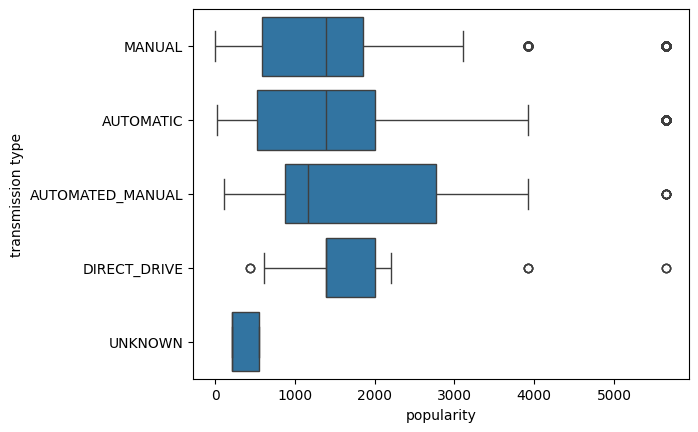

In [371]:
sns.boxplot(y="transmission type", x="popularity", data=prefered_df)

In [372]:
prefered_df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [373]:
# sns.scatterplot(x="engine hp", y="msrp", data=prefered_df)

In [374]:
# sns.regplot(x="engine hp", y="msrp", data=prefered_df)

In [375]:
prefered_df.head(10)

make       model  year             engine fuel type  engine hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   
5  BMW    1 Series  2012  premium unleaded (required)      230.0   
6  BMW    1 Series  2012  premium unleaded (required)      300.0   
7  BMW    1 Series  2012  premium unleaded (required)      300.0   
8  BMW    1 Series  2012  premium unleaded (required)      230.0   
9  BMW    1 Series  2013  premium unleaded (required)      230.0   

   engine cylinders transmission type     driven_wheels  number of doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   
5               6.0            MANUAL  rear wheel drive              2.0   
6               6.0            MANUAL  rear wheel drive              2.0   
7               6.0            MANUAL  rear wheel drive              2.0   
8               6.0            MANUAL  rear wheel drive              2.0   
9               6.0            MANUAL  rear wheel drive              2.0   

                         market category vehicle size vehicle style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   
5                     Luxury,Performance      Compact         Coupe   
6                     Luxury,Performance      Compact   Convertible   
7                Luxury,High-Performance      Compact         Coupe   
8                                 Luxury      Compact   Convertible   
9                                 Luxury      Compact   Convertible   

   highway mpg  city mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  
5           28        18        3916  31200  
6           26        17        3916  44100  
7           28        20        3916  39300  
8           28        18        3916  36900  
9           27        18        3916  37200

In [376]:
prefered_df["vehicle style"].unique().size

16

In [377]:
prefered_df.corr(numeric_only=True)

year  engine hp  engine cylinders  number of doors  \
year              1.000000   0.196554         -0.109555         0.118483   
engine hp         0.196554   1.000000          0.821338        -0.210317   
engine cylinders -0.109555   0.821338          1.000000        -0.165423   
number of doors   0.118483  -0.210317         -0.165423         1.000000   
highway mpg       0.251419  -0.477215         -0.631579         0.083858   
city mpg          0.196249  -0.494185         -0.605481         0.104758   
popularity        0.135467   0.040196          0.015047        -0.033900   
msrp              0.052588   0.648103          0.570221        -0.217311   

                  highway mpg  city mpg  popularity      msrp  
year                 0.251419  0.196249    0.135467  0.052588  
engine hp           -0.477215 -0.494185    0.040196  0.648103  
engine cylinders    -0.631579 -0.605481    0.015047  0.570221  
number of doors      0.083858  0.104758   -0.033900 -0.217311  
highway mpg          1.000000  0.885282   -0.005565 -0.209786  
city mpg             0.885282  1.000000    0.007535 -0.193981  
popularity          -0.005565  0.007535    1.000000 -0.053482  
msrp                -0.209786 -0.193981   -0.053482  1.000000

In [378]:
# sns.pairplot(data=prefered_df, kind='scatter' ,hue='year')

In [379]:
temp=['year','engine cylinders','engine hp','city mpg']
temp.reverse()
# sns.pairplot(data=prefered_df, kind='reg', x_vars=['year','engine hp','engine cylinders','city mpg'],y_vars=temp)

In [380]:
temp=['year','engine cylinders','engine hp','city mpg']
temp.reverse()
# sns.pairplot(data=prefered_df, kind='reg', x_vars=['year','engine hp'],y_vars=temp)

In [381]:
# sns.pairplot(data=prefered_df, kind='reg')

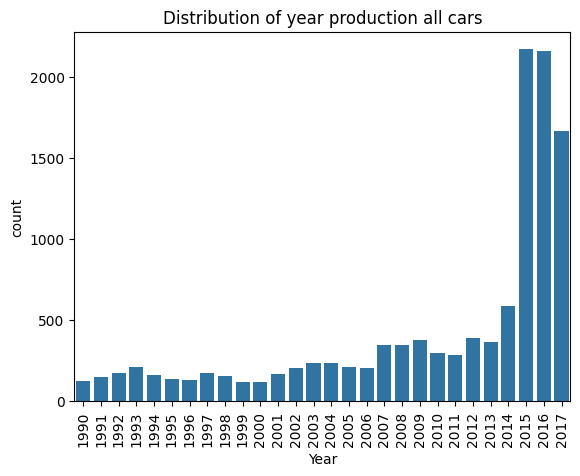

In [382]:
plt.title("Distribution of year production all cars")
sns.countplot(x='Year',data=df)
plt.xticks(rotation=90)
plt.show()

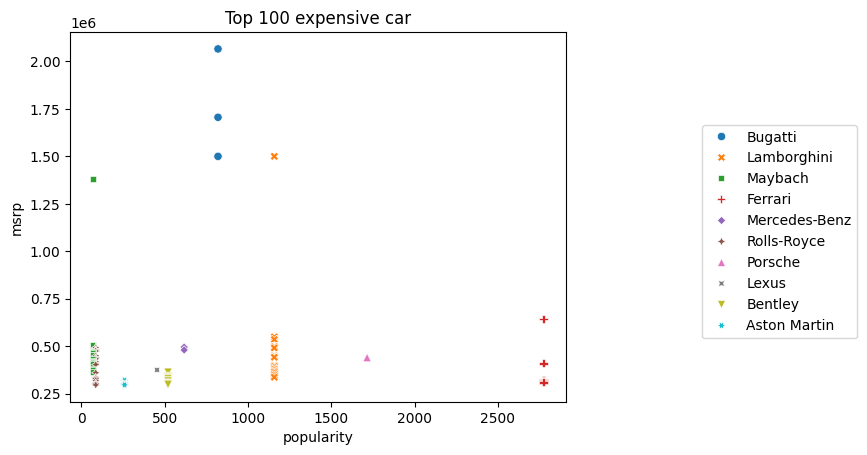

In [383]:
t_df=prefered_df.nlargest(columns='msrp',n=100)

sns.scatterplot(data=t_df,x='popularity',y='msrp',hue='make',style='make', legend='brief')
plt.title('Top 100 expensive car')
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=8)
plt.show()

In [384]:
# g=sns.PairGrid(data=prefered_df)
# g.map_offdiag(sns.scatterplot)
# g.map_diag(sns.histplot)
# plt.show()

<Axes: >

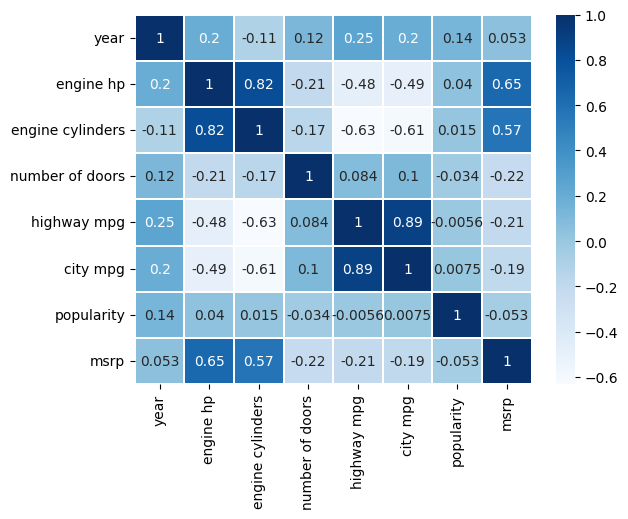

In [385]:
data_numeric=prefered_df.select_dtypes("number")
sns.heatmap(data=data_numeric.corr(), annot=True,cmap="Blues",linewidths=0.1)

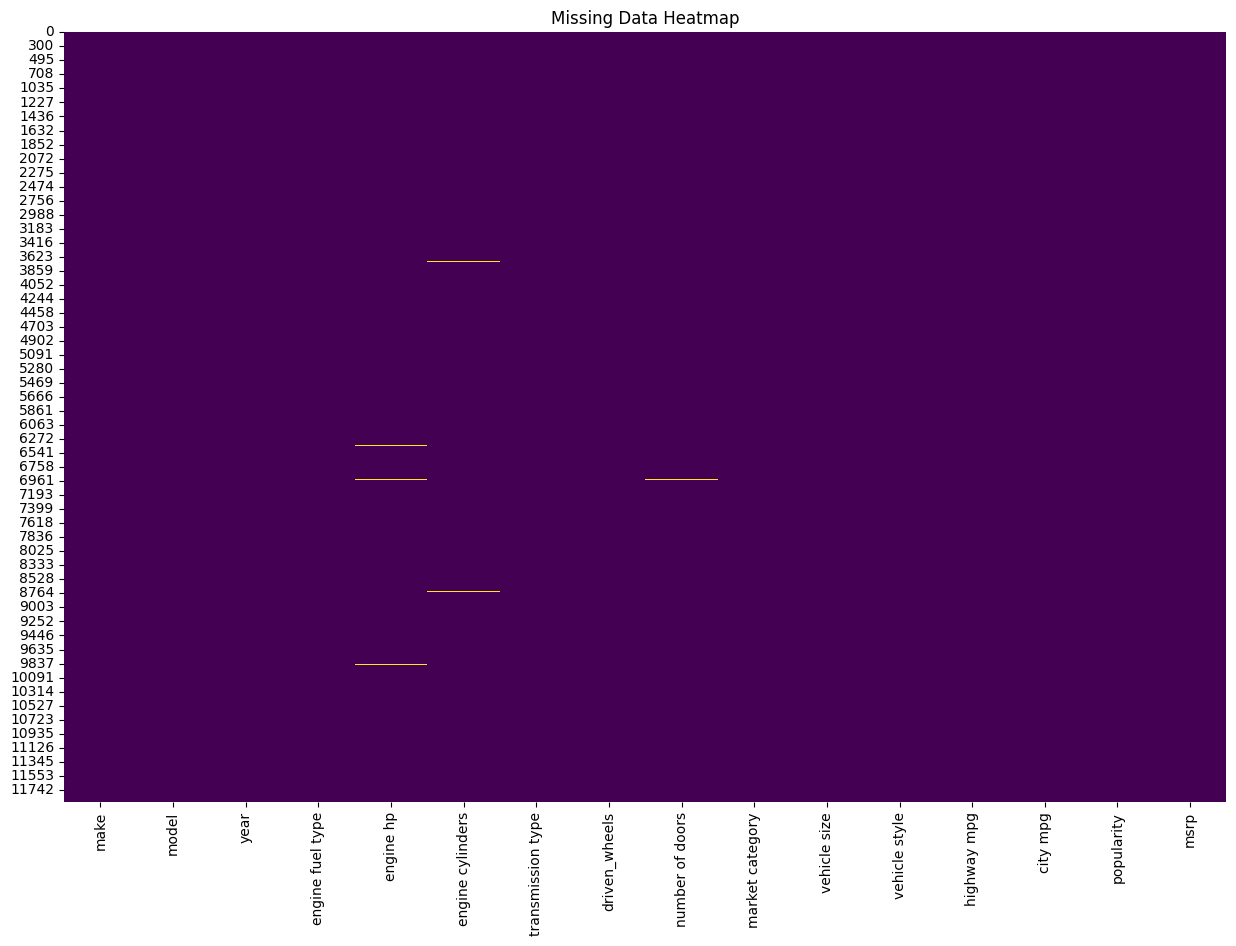

In [386]:
plt.figure(figsize=(15, 10))
sns.heatmap(prefered_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


                                         msrp
make         transmission type               
Acura        AUTOMATED_MANUAL    40859.047619
             AUTOMATIC           42364.151515
             MANUAL              25539.470588
Alfa Romeo   AUTOMATED_MANUAL    61600.000000
Aston Martin AUTOMATED_MANUAL   155986.590909
...                                       ...
Volkswagen   AUTOMATIC           30382.308970
             DIRECT_DRIVE        33371.250000
             MANUAL              26021.683594
Volvo        AUTOMATIC           41477.989071
             MANUAL              21288.833333

[111 rows x 1 columns]


msrp
make         transmission type               
Acura        AUTOMATED_MANUAL    40859.047619
             AUTOMATIC           42364.151515
             MANUAL              25539.470588
Alfa Romeo   AUTOMATED_MANUAL    61600.000000
Aston Martin AUTOMATED_MANUAL   155986.590909
...                                       ...
Volkswagen   AUTOMATIC           30382.308970
             DIRECT_DRIVE        33371.250000
             MANUAL              26021.683594
Volvo        AUTOMATIC           41477.989071
             MANUAL              21288.833333

[111 rows x 1 columns]

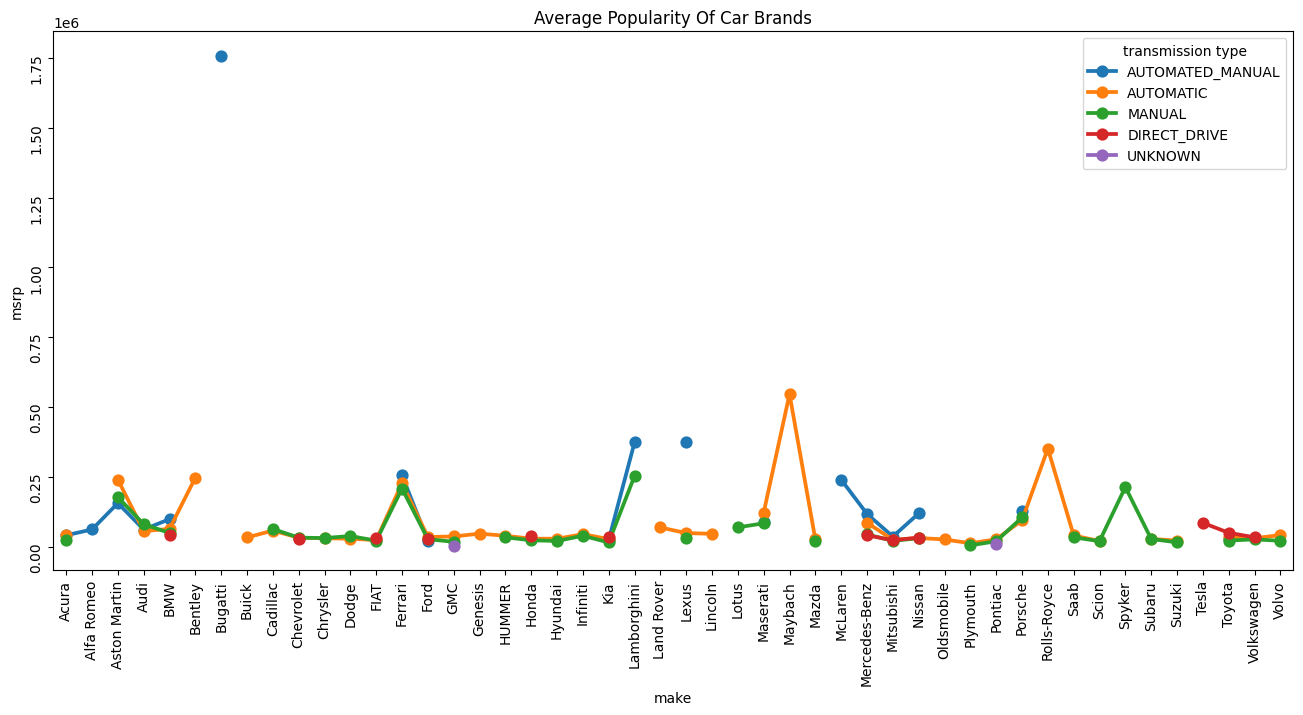

In [387]:
# prefered_df.pivot_table(columns='make', values='popularity',aggfunc='median', fill_value=0)
brands_popularity=prefered_df.pivot_table(index=['make','transmission type'], values='msrp',aggfunc='mean', fill_value=0)
print(prefered_df.groupby(by=['make','transmission type']).agg(func={'msrp':'mean'}))
plt.figure(figsize=(16,7))
plt.title('Average Popularity Of Car Brands')
plt.tick_params(labelsize=10,labelrotation=90)
sns.pointplot(data=brands_popularity, x='make', y='msrp',hue='transmission type')
brands_popularity

<Axes: title={'center': 'Average Popularity Of Car Brands'}, xlabel='make', ylabel='popularity'>

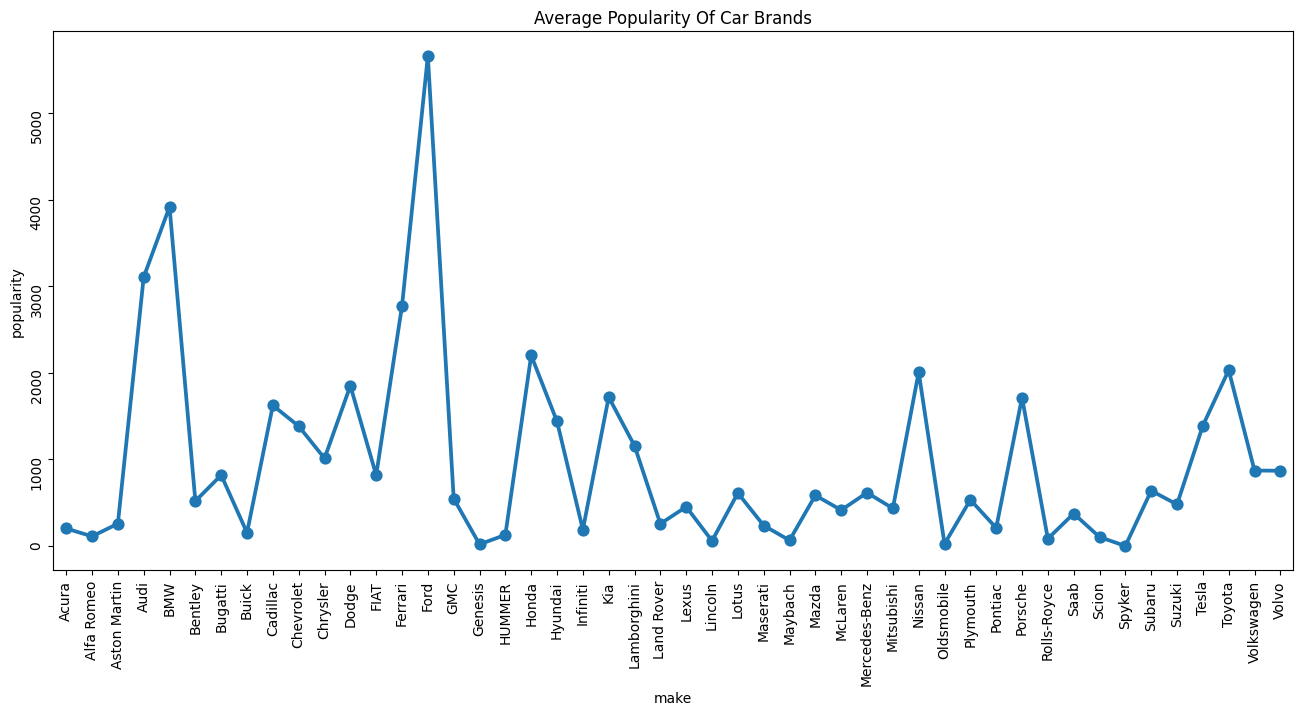

In [388]:
brands_popularity=prefered_df.pivot_table(index='make', values='popularity',aggfunc='median', fill_value=0)
plt.figure(figsize=(16,7))
plt.title('Average Popularity Of Car Brands')
plt.tick_params(labelsize=10,labelrotation=90)
sns.pointplot(data=brands_popularity, x='make', y='popularity')

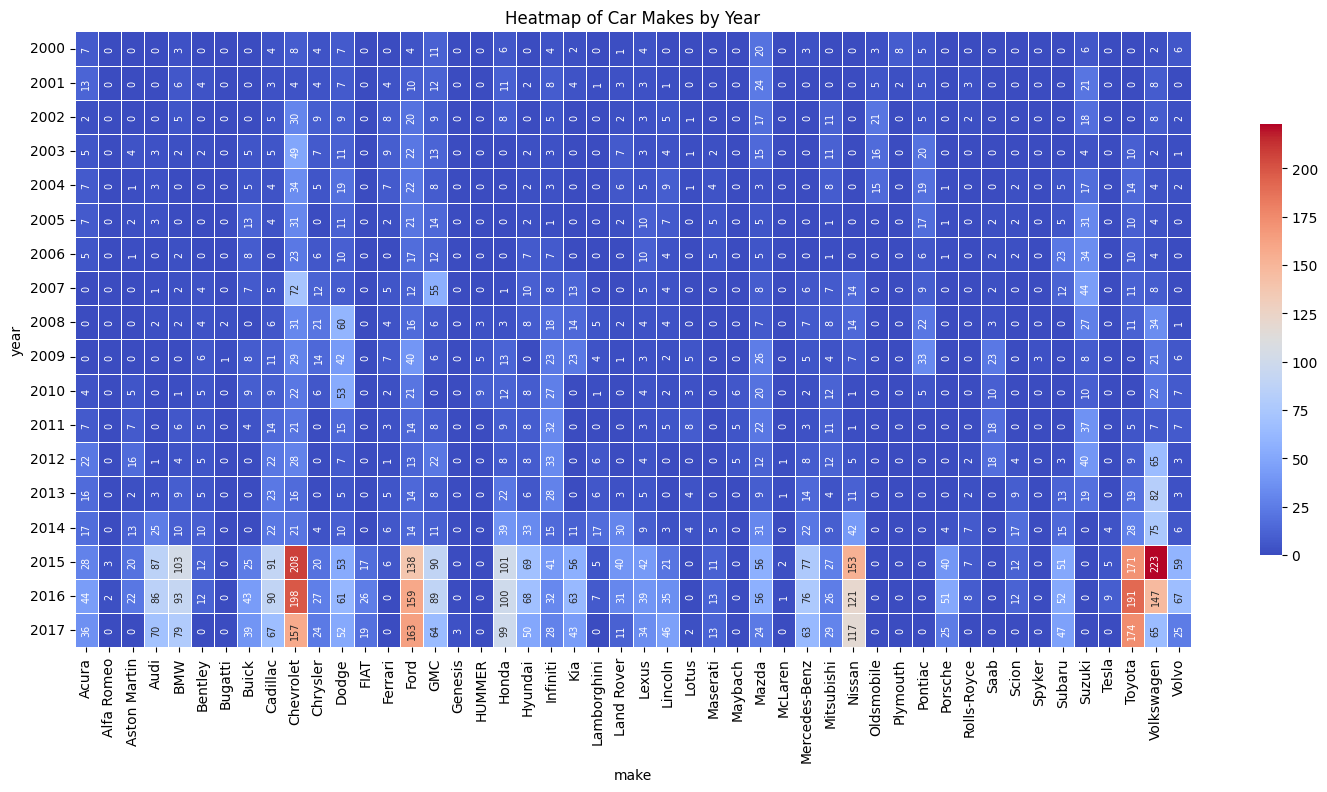

In [389]:

pivot_table = prefered_df.pivot_table(index='year', columns='make', values='msrp', aggfunc='count', fill_value=0)
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5,fmt="d", annot_kws={"fontstretch":"expanded","size":'x-small',"rotation":90},cbar_kws={"shrink":0.7})
plt.title("Heatmap of Car Makes by Year")
plt.show()


In [390]:
prefered_df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [391]:
cylinders_pivot=prefered_df.pivot_table(index='engine cylinders',columns='make',values='msrp',aggfunc='count',fill_value=0)

<Axes: xlabel='make', ylabel='engine cylinders'>

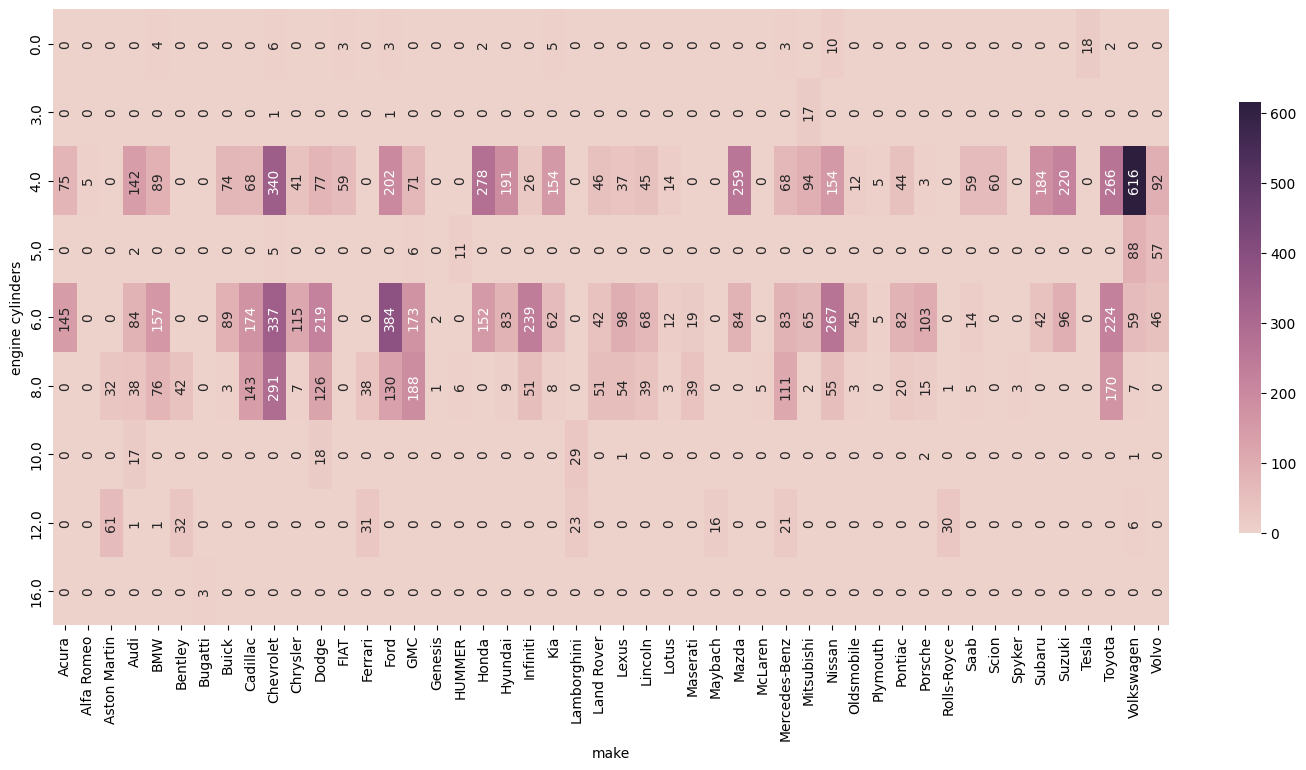

In [392]:
plt.figure(figsize=(18,8))
plt.tight_layout()
sns.heatmap(data=cylinders_pivot,cmap=sns.cubehelix_palette(as_cmap=True),annot=True,fmt="d", annot_kws={"size":10,"rotation":90},cbar_kws={"shrink":0.7})

In [393]:
prefered_df[prefered_df['engine hp'].isna()]
prefered_df.loc[(prefered_df['make']=='FIAT') & (prefered_df['model']=='500e')]

make model  year engine fuel type  engine hp  engine cylinders  \
539  FIAT  500e  2015         electric        NaN               0.0   
540  FIAT  500e  2016         electric        NaN               0.0   
541  FIAT  500e  2017         electric        NaN               0.0   

    transmission type      driven_wheels  number of doors market category  \
539      DIRECT_DRIVE  front wheel drive              2.0       Hatchback   
540      DIRECT_DRIVE  front wheel drive              2.0       Hatchback   
541      DIRECT_DRIVE  front wheel drive              2.0       Hatchback   

    vehicle size  vehicle style  highway mpg  city mpg  popularity   msrp  
539      Compact  2dr Hatchback          108       122         819  31800  
540      Compact  2dr Hatchback          103       121         819  31800  
541      Compact  2dr Hatchback          103       121         819  31800

In [394]:
from ydata_profiling import ProfileReport

In [395]:
profile=ProfileReport(df,title="Car Data")

In [396]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Helper Functions and Data types

In [593]:
def regression_combine_test(y_true,y_pred):
    print('Mean Squared : ',mean_squared_error(y_true, y_pred))
    print('Mean Absolute : ',mean_absolute_error(y_true, y_pred))
    print('Root Mean Square : ',root_mean_squared_error(y_true, y_pred))
    print('R2 Score : ',r2_score(y_true, y_pred))

In [610]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': tree.DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler(),
    'Robust Scaler': RobustScaler()
}

metrics={
    'Model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R2_SCORE': []
}

metrics_scaled = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R2_SCORE': []
}


cls_models = {
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=150, random_state=42)
}


cls_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix':[]
}

#### Regression For MSRP Using Engine HP

In [595]:
hp=pd.DataFrame(prefered_df['engine hp'].dropna())
msrp=pd.DataFrame(prefered_df.loc[prefered_df['engine hp'].dropna().index]['msrp'])
city_mpg=pd.DataFrame(prefered_df['city mpg'])
highway_mpg=pd.DataFrame(prefered_df['highway mpg'])

In [596]:
X_hp_train,X_hp_test,y_msrp_train,y_msrp_test=train_test_split(hp,msrp,shuffle=True,test_size=0.2)
X_city_train,X_city_test,y_highway_train,y_highway_test=train_test_split(city_mpg,highway_mpg,shuffle=True,test_size=0.2)

In [597]:
msrp_lin_reg=LinearRegression()
msrp_tree_reg=tree.DecisionTreeRegressor()
msrp_forest_reg=RandomForestRegressor(n_estimators=100, random_state=42)
msrp_lin_reg.fit(X_hp_train,y_msrp_train)
msrp_tree_reg.fit(X_hp_train,y_msrp_train)
msrp_forest_reg.fit(X_hp_train,y_msrp_train.to_numpy(dtype='int64').ravel())

RandomForestRegressor(random_state=42)

In [598]:
y_msrp_lin_pred=msrp_lin_reg.predict(X_hp_test)
y_msrp_tree_pred=msrp_tree_reg.predict(X_hp_test)
y_msrp_forest_pred=msrp_forest_reg.predict(X_hp_test)

In [599]:
print('Linear')
regression_combine_test(y_msrp_test,y_msrp_lin_pred)
print('Tree')
regression_combine_test(y_msrp_test,y_msrp_tree_pred)
print('Forest')
regression_combine_test(y_msrp_test,y_msrp_forest_pred)

Linear
Mean Squared :  1783916886.818865
Mean Absolute :  21264.195462147334
Root Mean Square :  42236.44027162877
R2 Score :  0.44172989442276034
Tree
Mean Squared :  415623088.9715481
Mean Absolute :  8128.023048491748
Root Mean Square :  20386.83616875233
R2 Score :  0.8699323116032343
Forest
Mean Squared :  356893408.7765314
Mean Absolute :  8156.165143702802
Root Mean Square :  18891.6227142226
R2 Score :  0.8883115449662057


In [600]:
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_hp_train)
    X_test_scaled = scaler.transform(X_hp_test)
    
    for name, model in models.items():
        
            
        model.fit(X_train_scaled, y_msrp_train.to_numpy(dtype='int64').ravel()) if name=='Random Forest' else model.fit(X_train_scaled, y_msrp_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_msrp_test, y_pred)
        mae = mean_absolute_error(y_msrp_test, y_pred)
        rmse = root_mean_squared_error(y_msrp_test, y_pred)
        r_squared = r2_score(y_msrp_test, y_pred)
        
        metrics_scaled['Model'].append(name)
        metrics_scaled['Scaler'].append(scaler_name)
        metrics_scaled['MSE'].append(mse)
        metrics_scaled['MAE'].append(mae)
        metrics_scaled['RMSE'].append(rmse)
        metrics_scaled['R2_SCORE'].append(r_squared)

pd.DataFrame(metrics_scaled).sort_values(by=['Model'])

Model           Scaler           MSE           MAE  \
1      Decision Tree   Min-Max Scaler  4.156231e+08   8128.023048   
4      Decision Tree  Standard Scaler  4.156231e+08   8128.023048   
7      Decision Tree    Robust Scaler  4.156231e+08   8128.023048   
0  Linear Regression   Min-Max Scaler  1.783917e+09  21264.195462   
3  Linear Regression  Standard Scaler  1.783917e+09  21264.195462   
6  Linear Regression    Robust Scaler  1.783917e+09  21264.195462   
2      Random Forest   Min-Max Scaler  3.568933e+08   8156.165144   
5      Random Forest  Standard Scaler  3.568928e+08   8156.109827   
8      Random Forest    Robust Scaler  3.568776e+08   8155.421298   

           RMSE  R2_SCORE  
1  20386.836169  0.869932  
4  20386.836169  0.869932  
7  20386.836169  0.869932  
0  42236.440272  0.441730  
3  42236.440272  0.441730  
6  42236.440272  0.441730  
2  18891.620367  0.888312  
5  18891.605520  0.888312  
8  18891.204477  0.888316

In [601]:

for name, model in models.items():        
    model.fit(X_city_train, y_highway_train.to_numpy(dtype='float64').ravel()) if name=='Random Forest' else model.fit(X_city_train, y_highway_train)
    y_pred = model.predict(X_city_test)
    mse = mean_squared_error(y_highway_test, y_pred)
    mae = mean_absolute_error(y_highway_test, y_pred)
    rmse = root_mean_squared_error(y_highway_test, y_pred)
    r_squared = r2_score(y_highway_test, y_pred)

    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)
    metrics['R2_SCORE'].append(r_squared)
    

pd.DataFrame(metrics).sort_values(by=['Model'])


Model       MSE       MAE      RMSE  R2_SCORE
1      Decision Tree  3.707386  1.443137  1.925457  0.943485
0  Linear Regression  8.103999  2.144361  2.846752  0.876463
2      Random Forest  3.692313  1.441955  1.921539  0.943715

#### Classification

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [671]:
X_cls=df.drop(columns=['Model','Market Category']).dropna()
y_cls=df['Market Category'].loc[X_cls.index]

X_cls_train,X_cls_test,y_cls_train,y_cls_test=train_test_split(X_cls,y_cls,test_size=0.2,shuffle=True)

In [672]:
from sklearn import preprocessing
def encode_features(df_train, df_test,features):
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(X_cls_train, X_cls_test,features = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels','Vehicle Size','Vehicle Style'])
# pred_train,pred_test=encode_features(pd.DataFrame(y_cls_train), pd.DataFrame(y_cls_test),features=['Market Category'])

# pred_train=pred_train.to_numpy().ravel()
# pred_test=pred_test.to_numpy().ravel()

In [679]:

# for name, model in cls_models.items():
#     model.fit(data_train, y_cls_train)
#     y_pred = model.predict(data_test)
#     accuracy = accuracy_score(y_cls_test, y_pred)
#     precision = precision_score(y_cls_test, y_pred, average='weighted')
#     recall = recall_score(y_cls_test, y_pred, average='weighted')
#     f1 = f1_score(y_cls_test, y_pred,average='weighted')
#     # cls_metrics['Confusion Matrix'].append(confusion_matrix(y_cls_test, y_pred))
#     cls_metrics['Model'].append(name)
#     cls_metrics['Accuracy'].append(accuracy)
#     cls_metrics['Precision'].append(precision)
#     cls_metrics['Recall'].append(recall)
#     cls_metrics['F1 Score'].append(f1)

# cls_metrics['Accuracy']


dtree = tree.DecisionTreeClassifier()
logreg=LogisticRegression()
nbayes = GaussianNB()
forest=RandomForestClassifier(n_estimators=150)


dtree.fit(data_train, y_cls_train)
logreg.fit(data_train,y_tcls_rain)
nbayes.fit(data_train, y_cls_train)
forest.fit(data_train, y_cls_train)


y_pred1=dtree.predict(data_test)
y_pred3=logreg.predict(data_test)
y_pred4=nbayes.predict(data_test)
y_pred5=forest.predict(data_test)

print('Svm : ',accuracy_score(y_test, y_pred2))
print('D tree : ',accuracy_score(y_test, y_pred1))
print('Log Reg : ',accuracy_score(y_test, y_pred3))
print('Naive Bayes : ',accuracy_score(y_test, y_pred4))
print('Forest: ',accuracy_score(y_test, y_pred5))

NameError: name 'svmachine' is not defined